In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics
import time

# to ignore the warnings
from warnings import filterwarnings

# Data From API

In [257]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [258]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12796 non-null  float64
 4   home_points     12796 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [259]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1446
home_points       1446
dtype: int64

In [260]:
# Convert date column to datetime if it's not already
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')

# Remove the time portion by formatting to only show year-month-day
scores_df['date'] = scores_df['date'].dt.strftime('%Y-%m-%d')

scores_df.dtypes


date               object
visitor            object
home               object
visitor_points    float64
home_points       float64
dtype: object

In [261]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
46,2024-11-13,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19,Atlanta Hawks,Boston Celtics,NaN,NaN
82,2025-03-16,Atlanta Hawks,Brooklyn Nets,NaN,NaN
83,2025-04-10,Atlanta Hawks,Brooklyn Nets,NaN,NaN
92,NaN,Charlotte Hornets,Atlanta Hawks,NaN,NaN
...,...,...,...,...,...
14210,NaN,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06,Utah Jazz,Washington Wizards,NaN,NaN


In [262]:
# Drop all rows that have no points for either team
df1 = scores_df.dropna()

# Display
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12796 entries, 0 to 14240
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            12796 non-null  object 
 1   visitor         12796 non-null  object 
 2   home            12796 non-null  object 
 3   visitor_points  12796 non-null  float64
 4   home_points     12796 non-null  float64
dtypes: float64(2), object(3)
memory usage: 599.8+ KB


# Data From Kaggle --> Excel File

In [263]:
df2 = pd.read_excel('./data/games_scores_2019-2022.xlsx')
df2.head()

,date,home_full_name,home_points,visitor_full_name,visitor_points
0,2022-12-22,New Orleans Pelicans,126,San Antonio Spurs,117
1,2022-12-22,Utah Jazz,120,Washington Wizards,112
2,2022-12-21,Cleveland Cavaliers,114,Milwaukee Bucks,106
3,2022-12-21,Philadelphia 76ers,113,Detroit Pistons,93
4,2022-12-21,Atlanta Hawks,108,Chicago Bulls,110


In [264]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               5185 non-null   object
 1   home_full_name     5185 non-null   object
 2   home_points        5185 non-null   int64 
 3   visitor_full_name  5185 non-null   object
 4   visitor_points     5185 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 202.7+ KB


In [265]:
# Reference df1 headers
df1.columns.values

array(['date', 'visitor', 'home', 'visitor_points', 'home_points'],
      dtype=object)

In [266]:
# Rename columns to match df1 dataframe
df2 = df2.rename(columns={'visitor_full_name': 'visitor',
                    'home_full_name': 'home'})

# Rearrange columns
df2 = df2[['date', 'visitor', 'home', 'visitor_points', 'home_points']]

# Display
df2.head()


,date,visitor,home,visitor_points,home_points
0,2022-12-22,San Antonio Spurs,New Orleans Pelicans,117,126
1,2022-12-22,Washington Wizards,Utah Jazz,112,120
2,2022-12-21,Milwaukee Bucks,Cleveland Cavaliers,106,114
3,2022-12-21,Detroit Pistons,Philadelphia 76ers,93,113
4,2022-12-21,Chicago Bulls,Atlanta Hawks,110,108


In [267]:
# Union the two Dataframes
final_df = pd.concat([df1, df2], ignore_index=True)

# Sort by date and reset index
final_df = final_df.sort_values(by='date').reset_index(drop=True)

print(f'Total rows from final dataframe: {len(final_df)}')

# Display
final_df

Total rows from final dataframe: 17981


,date,visitor,home,visitor_points,home_points
0,2015-10-03,Charlotte Hornets,Orlando Magic,106.0,100.0
1,2015-10-03,New Orleans Pelicans,Indiana Pacers,110.0,105.0
2,2015-10-03,Denver Nuggets,LA Clippers,96.0,103.0
3,2015-10-04,Charlotte Hornets,Miami Heat,90.0,77.0
4,2015-10-04,LA Clippers,Toronto Raptors,73.0,93.0
...,...,...,...,...,...
17976,2024-11-05,Portland Trail Blazers,New Orleans Pelicans,118.0,100.0
17977,2024-11-05,Toronto Raptors,Denver Nuggets,119.0,121.0
17978,2024-11-05,Sacramento Kings,Miami Heat,111.0,110.0
17979,2024-11-05,Milwaukee Bucks,Cleveland Cavaliers,114.0,116.0


In [ ]:
# Find rows that are duplicated from the final dataframe
duplicate_count = final_df[final_df.duplicated()]

print(f'Total duplicates found after union: {len(duplicate_count)}')

Total duplicates found after union: 1237


In [276]:
# Drop duplicates
final_df = final_df.drop_duplicates()

print(f'Total rows of data after dropping duplicates: {len(final_df)}')

Total rows of data after dropping duplicates: 13112


In [275]:
# There are some rows in the dataframe where all columns except the 'date' column are the same. The difference between these columns is that the dates are off by one day
# These rows will be removed while only retaining the most recent date 

# Drop duplicates based on all columns except 'date', keeping the first occurrence
final_df = final_df.drop_duplicates(subset=['home', 'visitor', 'home_points', 'visitor_points'], keep='first')

print(f'Final length of data frame after remove rows where dates are off by one day: {len(final_df)}')
final_df.reset_index(drop=True)

Final length of data frame after remove rows where dates are off by one day: 13112


,date,visitor,home,visitor_points,home_points
0,2015-10-03,Charlotte Hornets,Orlando Magic,106.0,100.0
1,2015-10-03,New Orleans Pelicans,Indiana Pacers,110.0,105.0
2,2015-10-03,Denver Nuggets,LA Clippers,96.0,103.0
3,2015-10-04,Charlotte Hornets,Miami Heat,90.0,77.0
4,2015-10-04,LA Clippers,Toronto Raptors,73.0,93.0
...,...,...,...,...,...
13107,2024-11-05,Portland Trail Blazers,New Orleans Pelicans,118.0,100.0
13108,2024-11-05,Toronto Raptors,Denver Nuggets,119.0,121.0
13109,2024-11-05,Sacramento Kings,Miami Heat,111.0,110.0
13110,2024-11-05,Milwaukee Bucks,Cleveland Cavaliers,114.0,116.0


In [297]:
# Export to excel file
final_df.to_excel('./data/gameScores_2015-2024.xlsx', index=False)

# Betting Analysis

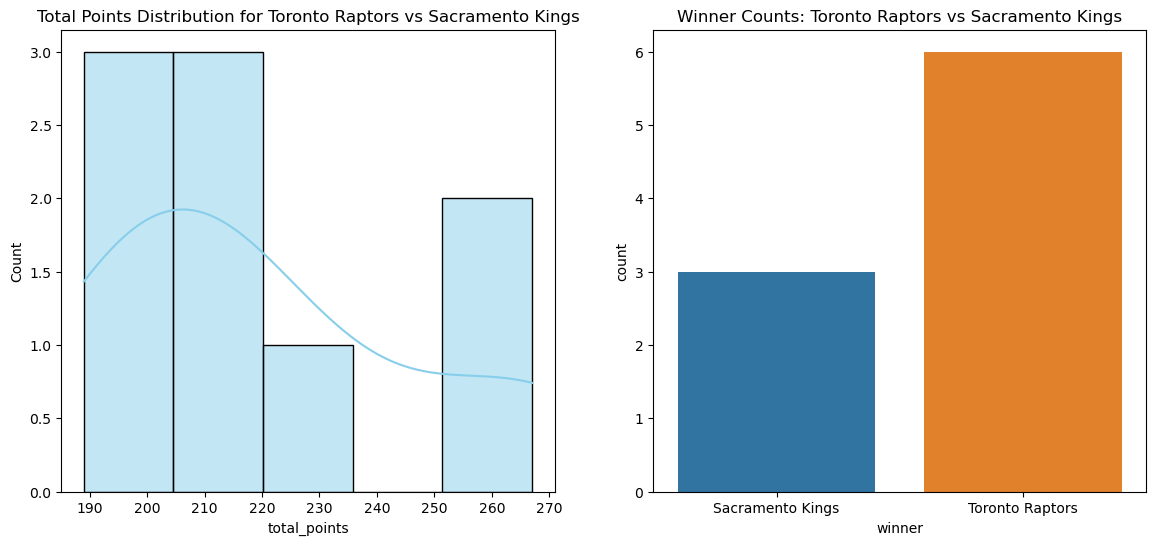

Statistics of Toronto Raptors vs Sacramento Kings


Mean: 220.55555555555554
Standard Deviation: 28.487326616897167
------------------------------------
z-score for 229.5: 0.31
z-score for 230.5: 0.35
z-score for 231.5: 0.38
z-score for 232.5: 0.42
z-score for 233.5: 0.45
z-score for 234.5: 0.49
z-score for 235.5: 0.52
z-score for 236.5: 0.56
z-score for 237.5: 0.59
z-score for 238.5: 0.63
z-score for 239.5: 0.67
z-score for 240.5: 0.70
z-score for 241.5: 0.74
z-score for 242.5: 0.77
z-score for 243.5: 0.81


,date,visitor,home,visitor_points,home_points,total_points,winner
250,2015-11-16,Toronto Raptors,Sacramento Kings,101.0,107.0,208.0,Sacramento Kings
1707,2016-11-21,Toronto Raptors,Sacramento Kings,99.0,102.0,201.0,Sacramento Kings
3351,2017-12-10,Toronto Raptors,Sacramento Kings,102.0,87.0,189.0,Toronto Raptors
4597,2018-11-08,Toronto Raptors,Sacramento Kings,114.0,105.0,219.0,Toronto Raptors
8625,2020-03-08,Toronto Raptors,Sacramento Kings,118.0,113.0,231.0,Toronto Raptors
9452,2021-01-08,Toronto Raptors,Sacramento Kings,144.0,123.0,267.0,Toronto Raptors
12223,2021-11-19,Toronto Raptors,Sacramento Kings,108.0,89.0,197.0,Toronto Raptors
15823,2023-01-26,Toronto Raptors,Sacramento Kings,113.0,95.0,208.0,Toronto Raptors
17001,2024-01-06,Toronto Raptors,Sacramento Kings,130.0,135.0,265.0,Sacramento Kings


In [ ]:
# def possible_outcome(dataframe, away_team, home_team, first_line): 
#     # Filter the dataframe for the specific matchup
#     matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
#     # Add a 'total_points' column 
#     matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
#     #
#     # Determine the winner
#     matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
    
#     # Create side-by-side plots
#     fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
#     # Plot total points distribution with a KDE
#     sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
#     axes[0].set_title(f'Total Points Distribution for {away_team} vs {home_team}')
    
#     # Plot the winner count    
#     sns.countplot(data=matchup_game, x='winner', ax=axes[1], hue='winner')
#     axes[1].set_title(f'Winner Counts: {away_team} vs {home_team}')
        
#     # Display the plots
#     plt.show()
    
#      # Calculate a z-score from a provided mean and standard deviation
#     mean = matchup_game['total_points'].mean()
#     standard_deviation = matchup_game['total_points'].std()
   
#     # Create array of UNDER/OVER values starting with given first line
#     under_over_lines = [first_line + i for i in range(15)]
    
#     # Display basic statics of team matchup
#     print(f'Statistics of {away_team} vs {home_team}')
#     print('\n')
#     print(f'Mean: {mean}')
#     print(f'Standard Deviation: {standard_deviation}')

#     print('------------------------------------')
#     # Display the z-scores for each line score
#     for line in under_over_lines:
#         zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
#         print(f'z-score for {line}: {zscore:.2f}')

#     # print('------------------------------------')

#     # Find percentage of games between specified range
#     # total_games = len(matchup_game)
#     # games_in_range = matchup_game[(matchup_game['total_points'] >= lower_bound) & (matchup_game['total_points'] <= upper_bound)]
#     # percentage = (len(games_in_range) / total_games) * 100
#     # print(f"Percentage of games with total scores between {lower_bound} and {upper_bound}: {percentage:.2f}%")
#     # print('------------------------------------')
    
#     return matchup_game

# away_team = input("Enter the away team: ")
# home_team = input("Enter the home team: ")
# first_line = float(input("Enter the first line for the over/under bet: "))


# possible_outcome(final_df, away_team, home_team, first_line)

In [292]:
teams = final_df['visitor'].unique()
teams

array(['Charlotte Hornets', 'New Orleans Pelicans', 'Denver Nuggets',
       'LA Clippers', 'Utah Jazz', 'Sacramento Kings', 'Toronto Raptors',
       'Philadelphia 76ers', 'Indiana Pacers', 'Milwaukee Bucks',
       'Orlando Magic', 'Atlanta Hawks', 'Houston Rockets',
       'Cleveland Cavaliers', 'Brooklyn Nets', 'Dallas Mavericks',
       'Oklahoma City Thunder', 'Chicago Bulls', 'San Antonio Spurs',
       'New York Knicks', 'Golden State Warriors',
       'Portland Trail Blazers', 'Detroit Pistons', 'Memphis Grizzlies',
       'Minnesota Timberwolves', 'Miami Heat', 'Boston Celtics',
       'Washington Wizards', 'Phoenix Suns', 'Los Angeles Lakers',
       'Los Angeles Clippers'], dtype=object)

# Future Games

In [287]:
# Get the current date
current_date = dt.date.today()
current_date_string = current_date.strftime("%Y-%m-%d")

# Find games that havent happened yet
future_games = scores_df[(scores_df['date'] >= current_date_string) & (pd.isna(scores_df['visitor_points']))]
future_games = future_games.sort_values(by='date')
future_games

,date,visitor,home,visitor_points,home_points
1261,2024-11-07,Golden State Warriors,Boston Celtics,NaN,NaN
9535,2024-11-07,Philadelphia 76ers,LA Clippers,NaN,NaN
9001,2024-11-07,Orlando Magic,Indiana Pacers,NaN,NaN
11163,2024-11-07,Miami Heat,Phoenix Suns,NaN,NaN
8596,2024-11-07,San Antonio Spurs,Houston Rockets,NaN,NaN
...,...,...,...,...,...
6858,2025-04-13,Detroit Pistons,Milwaukee Bucks,NaN,NaN
10171,2025-04-13,Los Angeles Lakers,Portland Trail Blazers,NaN,NaN
7381,2025-04-13,LA Clippers,Golden State Warriors,NaN,NaN
13615,2025-04-13,Phoenix Suns,Sacramento Kings,NaN,NaN
